Manim Community v0.18.1

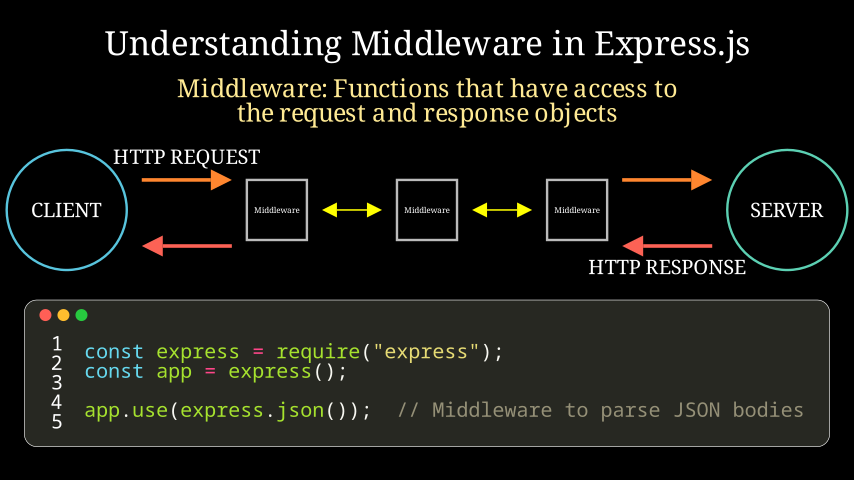

In [89]:
from manim import *

class ClientServerDiagram(Scene):
    def construct(self):
        # Define the shift distances
        client_shift_distance = LEFT * 2
        server_shift_distance = RIGHT * 2
        middleware_to_client_shift_distance = LEFT * 2
        figure_shift = UP * 0.5
        # Title and definition
        title = Text("Understanding Middleware in Express.js", font_size=40).to_edge(UP)
        self.play(Write(title))
        middleware_def = Paragraph(
            "Middleware: Functions that have access to",
            "the request and response objects",
            font_size=30,
            color=YELLOW_B,
            alignment="center",
        ).next_to(title, DOWN)
        self.play(Write(middleware_def))
            
        # Create shapes
        client = Circle(radius=1, color=BLUE).shift(LEFT * 4).shift(figure_shift)
        client_label = Text("CLIENT").scale(0.5).move_to(client)

        server = Circle(radius=1, color=TEAL).shift(RIGHT * 4).shift(figure_shift)
        server_label = Text("SERVER").scale(0.5).move_to(server)

        middleware = Rectangle(width=2, height=1, color=LIGHT_GRAY).shift(figure_shift)
        middleware_label = Text("Middleware").scale(0.4).move_to(middleware)

        # Animate shapes
        self.play(Create(client), Write(client_label))
        self.play(Create(server), Write(server_label))
        self.play(Create(middleware), Write(middleware_label))

        # Animate HTTP request
        request_arrow, request_label = self.add_horizontal_arrow(client, middleware, "HTTP REQUEST", shift_up=0.5, color=ORANGE, text_buff = 0.35)
        self.play(Create(request_arrow), Write(request_label))

        middleware_to_server_arrow, _ = self.add_horizontal_arrow(middleware, server, "", shift_up=0.5, color=ORANGE)
        self.play(Create(middleware_to_server_arrow))

        # Animate HTTP response
        response_arrow, response_label = self.add_horizontal_arrow(server, middleware, "HTTP RESPONSE", shift_up=-0.6, color=RED, text_buff=-0.35)
        self.play(Create(response_arrow), Write(response_label))

        # Animate HTTP response back to client
        middleware_to_client_arrow, _ = self.add_horizontal_arrow(middleware, client, "", shift_up=-0.6, color=RED, text_buff=-0.3)
        self.play(Create(middleware_to_client_arrow))

        # Move client-related elements
        self.play(
            client.animate.shift(client_shift_distance),
            client_label.animate.shift(client_shift_distance),
            request_arrow.animate.shift(client_shift_distance),
            request_label.animate.shift(client_shift_distance),
            response_arrow.animate.shift(server_shift_distance),
            response_label.animate.shift(server_shift_distance),  # Shift the response label to the right
            server.animate.shift(server_shift_distance),
            server_label.animate.shift(server_shift_distance),
            middleware_to_server_arrow.animate.shift(server_shift_distance),
            middleware_to_client_arrow.animate.shift(middleware_to_client_shift_distance),
            middleware.animate.scale(0.5*RIGHT+UP),
            middleware_label.animate.scale(0.5),
        )

        middleware2 = Rectangle(width=1, height=1, color=LIGHT_GRAY).shift(LEFT * 2.5).shift(figure_shift)
        middleware_label2 = Text("Middleware").scale(0.2).move_to(middleware2)

        middleware3 = Rectangle(width=1, height=1, color=LIGHT_GRAY).shift(RIGHT * 2.5).shift(figure_shift)
        middleware_label3 = Text("Middleware").scale(0.2).move_to(middleware3)

        self.play(Create(middleware2), Write(middleware_label2), Create(middleware3), Write(middleware_label3))

        # Add new bidirectional arrows between middleware rectangles
        middleware_to_middleware2_arrow = self.add_bidirectional_arrow(middleware, middleware2, color=YELLOW).scale(0.0001)
        middleware_to_middleware3_arrow = self.add_bidirectional_arrow(middleware, middleware3, color=YELLOW).scale(0.0001)

        self.add(middleware_to_middleware2_arrow, middleware_to_middleware3_arrow)
        self.play(middleware_to_middleware2_arrow.animate.scale(1/0.0001), middleware_to_middleware3_arrow.animate.scale(1/0.0001), run_time= 0.5)

        self.wait(1)

        code = '''const express = require("express");
const app = express();

app.use(express.json());  // Middleware to parse JSON bodies
        '''
        code_text = Code(code=code, tab_width=4, background="window", language="javascript", font_size=24, style="Monokai").next_to(middleware, DOWN).shift(DOWN*0.75)
        
        self.play(Write(code_text))
        self.wait(3)


    def add_horizontal_arrow(self, mobject1, mobject2, label_text, shift_up=0.0, text_buff=0.3, **kwargs):
        # Get the edge centers of the mobjects
        if mobject1.get_center()[0] < mobject2.get_center()[0]:
            start = mobject1.get_edge_center(RIGHT)
            end = mobject2.get_edge_center(LEFT)
        else:
            start = mobject1.get_edge_center(LEFT)
            end = mobject2.get_edge_center(RIGHT)
        
        # Shift the arrow up or down
        start[1] += shift_up
        end[1] += shift_up
        
        # Create the arrow
        arrow = Arrow(start=start, end=end, **kwargs)
        
        # Create the label
        label = Text(label_text).scale(0.5)
        if text_buff >= 0:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        else:
            label.move_to(arrow.get_center() + np.array([0, text_buff, 0]))
        return arrow, label

    def add_bidirectional_arrow(self, mobject1, mobject2, **kwargs):
        # Get the edge centers of the mobjects
        if mobject1.get_center()[0] < mobject2.get_center()[0]:
            start = mobject1.get_edge_center(RIGHT)
            end = mobject2.get_edge_center(LEFT)debug 
        else:
            start = mobject1.get_edge_center(LEFT)
            end = mobject2.get_edge_center(RIGHT)
        
        # Create the bidirectional arrow
        return DoubleArrow(start=start, end=end, **kwargs)



%manim -ql --save_last_frame -v CRITICAL ClientServerDiagram

In [6]:
from manim import *

class MiddlewareExplainer(Scene):
    def construct(self):
        # Scene 1: Introduction
        title = Text("Understanding Middleware in Express.js", font_size=40)
        self.play(Write(title))
        self.wait(2)
        self.play(FadeOut(title))

        # Scene 2: What is Middleware?
        middleware_def = Text("Middleware: Functions that have access to the request and response objects", font_size=30)
        middleware_def.to_edge(UP)
        self.play(Write(middleware_def))

        # Create request and response objects
        request = Square(side_length=1.5, color=BLUE).shift(LEFT*3)
        response = Square(side_length=1.5, color=GREEN).shift(RIGHT*3)
        req_label = Text("Request", font_size=24).next_to(request, DOWN)
        res_label = Text("Response", font_size=24).next_to(response, DOWN)

        self.play(Create(request), Create(response), Write(req_label), Write(res_label))
        self.wait(2)

        # Scene 3: Middleware Function
        middleware = Rectangle(height=3, width=2, color=YELLOW).shift(UP*0.5)
        middleware_label = Text("Middleware", font_size=24).next_to(middleware, UP)
        
        self.play(Create(middleware), Write(middleware_label))
        self.wait(1)

        # Arrows to show flow
        arrow1 = Arrow(request.get_right(), middleware.get_left(), buff=0.3)
        arrow2 = Arrow(middleware.get_right(), response.get_left(), buff=0.3)
        
        self.play(Create(arrow1), Create(arrow2))
        self.wait(2)

        # Scene 4: Multiple Middleware
        self.play(FadeOut(middleware), FadeOut(middleware_label), FadeOut(arrow1), FadeOut(arrow2))
        
        middlewares = VGroup(*[Rectangle(height=1, width=1.5, color=YELLOW) for _ in range(3)])
        middlewares.arrange(RIGHT, buff=1)
        middleware_labels = VGroup(*[Text(f"Middleware {i+1}", font_size=20).next_to(m, UP) for i, m in enumerate(middlewares)])
        
        self.play(Create(middlewares), Write(middleware_labels))
        
        arrows = VGroup(*[Arrow(m1.get_right(), m2.get_left(), buff=0.2) for m1, m2 in zip(middlewares, middlewares[1:])])
        start_arrow = Arrow(request.get_right(), middlewares[0].get_left(), buff=0.2)
        end_arrow = Arrow(middlewares[-1].get_right(), response.get_left(), buff=0.2)
        
        self.play(Create(arrows), Create(start_arrow), Create(end_arrow))
        self.wait(2)

        # Scene 5: Express Middleware Example
        self.play(FadeOut(VGroup(middlewares, middleware_labels, arrows, start_arrow, end_arrow, request, response, req_label, res_label)))
        
        code = """
        app.use((req, res, next) => {
          console.log('Time:', Date.now());
          next();
        });
        """
        code_text = Code(code=code, tab_width=4, background="window", language="javascript", font_size=24)
        
        self.play(Write(code_text))
        self.wait(3)

        # Final Scene: Conclusion
        conclusion = Text("Middleware: The backbone of Express.js application logic", font_size=32)
        self.play(FadeOut(code_text), Write(conclusion))
        self.wait(2)
        self.play(FadeOut(conclusion))

%manim -ql -v CRITICAL MiddlewareExplainer

Manim Community v0.18.1

In [62]:
from manim import *

class DoubleArrowAnimation(Scene):
    def construct(self):
        # Define points for the arrow
        start_point = LEFT * 3
        end_point = RIGHT * 3

        # Create a double arrow
        double_arrow = DoubleArrow(start=start_point, end=end_point, color=BLUE)
        # self.play(Create(double_arrow))  # Animate the creation of the double arrow

        # Optional: Add a label to the arrow
        label = Text("Bidirectional", color=WHITE).scale(0.5).next_to(double_arrow, UP)
        self.play(Write(label))  # Animate the writing of the label

        # Define a new position for the arrow
        new_start_point = LEFT * 2
        new_end_point = RIGHT * 2

        # Animate the double arrow moving to a new position
        # self.play(
        #     double_arrow.animate.move_to([new_start_point[0] + (new_end_point[0] - new_start_point[0]) / 2, 0, 0]),
        #     # Adjust label position to the new location
        #     label.animate.move_to(double_arrow.get_center() + UP * 0.5)
        # )
        self.add(double_arrow)
        double_arrow.scale(0)
        # self.wait(2)  # Keep the final state for a short time
        
        self.play(double_arrow.animate.scale(1))

%manim -ql -v CRITICAL DoubleArrowAnimation

Manim Community v0.18.1

In [70]:
from manim import *

class ScaleArrowAnimation(Scene):
    def construct(self):
        # Define start and end points for the arrow
        start_point = LEFT * 2
        end_point = RIGHT * 2

        # Create an arrow
        arrow = DoubleArrow(start=start_point, end=end_point, color=BLUE).scale(0.0001)
        self.add(arrow) 
        self.play(arrow.animate.scale(2/0.0001), run_time= 0.5)

        self.wait(2)  # Keep the final state for a short time
%manim -ql -v CRITICAL ScaleArrowAnimation

Manim Community v0.18.1

In [98]:
from manim import *

class YellowGradient(Scene):
    def construct(self):
        # Define the gradient colors
        gradient_colors = [YELLOW, YELLOW_A, YELLOW_B, YELLOW_C, YELLOW_D, YELLOW_E]

        # Create shapes with different shades of yellow
        shapes = []
        for i, color in enumerate(gradient_colors):
            shape = Circle(radius=0.5, color=color).to_edge(LEFT).shift(RIGHT * i * 2.2)
            shapes.append(shape)

        # Display the shapes
        self.play(*[Create(shape) for shape in shapes])

        # Add labels to identify each color
        labels = []
        for i, color in enumerate(gradient_colors):
            label = Text(f"YELLOW_{chr(65 + i)}", color=color).scale(0.5).move_to(shapes[i])
            labels.append(label)

        # Display the labels
        self.play(*[Write(label) for label in labels])

        # Keep the scene displayed for a while
        self.wait(3)
%manim -ql -v CRITICAL YellowGradient

Manim Community v0.18.1

In [102]:
from manim import *

class YellowGradient(Scene):
    def construct(self):
        # Define the gradient colors
        gradient_colors = [YELLOW, YELLOW_A, YELLOW_B, YELLOW_C, YELLOW_D, YELLOW_E]

        # Create shapes with different shades of yellow
        shapes = []
        for i, color in enumerate(gradient_colors):
            shape = Circle(radius=0.5, color=color).to_edge(LEFT).shift(RIGHT * i * 2.2)
            shapes.append(shape)

        # Display the shapes

        # Add labels to identify each color
        labels = []
        for i, color in enumerate(gradient_colors):
            label = Text(f"YELLOW_{chr(65 + i)}", color=color).scale(0.5).move_to(shapes[i])
            labels.append(label)

        # Display the labels
        self.play(*[Create(shape) for shape in shapes], *[Write(label) for label in labels])

        # Keep the scene displayed for a while
        # self.wait(3)
%manim -ql -v CRITICAL YellowGradient

Manim Community v0.18.1